# Question1

##Data is Here!




### Data Downloading and Managing

In [41]:
import os

# calling kaggle API of mine
os.environ['KAGGLE_USERNAME'] = "physicboy"
os.environ['KAGGLE_KEY'] = "8aa001f1cc35c599fe3f292a6a1f4198"

!kaggle datasets download -d hojjatk/mnist-dataset

# it download the zip file in /content


 64% 14.0M/22.0M [00:00<00:00, 74.0MB/s]
100% 22.0M/22.0M [00:00<00:00, 93.7MB/s]


In [42]:
## Now unzip the downloaded dataset file
import zipfile
zipfile_path = "/content/mnist-dataset.zip"
dataset_path = "MNIST_dataset"

# reading Zipfile refer as zipped
with zipfile.ZipFile(zipfile_path ,"r") as zipped:
  zipped.extractall(dataset_path)






## Scratch Dataset

In [55]:
## custum dataset
!pip install idx2numpy
import torch
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt

train_dataset_directory_images = dataset_path+"/train-images.idx3-ubyte" # dataset directory for training images
train_dataset_directory_labels= dataset_path+"/train-labels.idx1-ubyte" # dataset directory for training labels

class DatasetScratch:
    def __init__(self, image_file, label_file,transform=None):
        self.images = torch.tensor(idx2numpy.convert_from_file(image_file)).float() # images from idx file --> to tensor
        self.labels = torch.tensor(idx2numpy.convert_from_file(label_file)).float()# corresponding labels from idx file  -->to tensor
        self.length = len(self.labels)
        self.transform = transform

    def __getitem__(self, index):
        if(self.transform):
          self.images[index] = transform(self.images[index])

        return self.images[index], self.labels[index]

    def __len__(self):
        return self.length



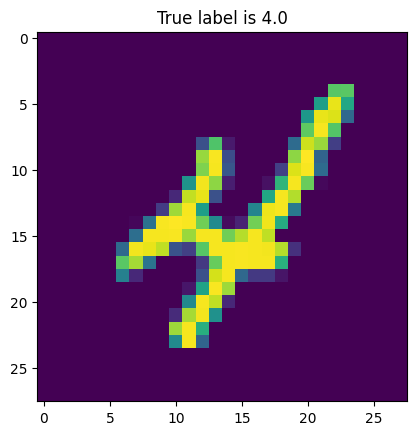

In [56]:
scratch_dataset_train = DatasetScratch(train_dataset_directory_images,train_dataset_directory_labels)

# checking the Scratch Dataset
def visualizeImage(dataset,index):
    image, label = dataset[index]
    plt.imshow(image.numpy())
    plt.title(f"True label is {label.numpy()}") # for plotting i convert it into numpy()

visualizeImage(scratch_dataset_train,9)

## Scratch DataLoader

In [57]:
## Scratch DataLoader
class DataLoaderScratch:
    def __init__(self,dataset,batchsize,shuffle=True):
        self.dataset  = dataset
        self.batchsize = batchsize
        self.shuffle = shuffle
    def __iter__(self):
        if self.shuffle:
            indices  = torch.randperm(len(self.dataset)).long()
        else:
            indices =torch.arange(len(self.dataset)).long()
        # Creating batches
        for start_index in range(0,len(self.dataset),self.batchsize):
            end_index = start_index + self.batchsize
            batch_indices = indices[start_index:end_index]
            images,labels = self.dataset[batch_indices]
            #print(images.shape)
            batch = images,labels
            yield batch
    def __len__(self):
    # Calculate and return the total number of batches
        return -(-len(self.dataset) // self.batchsize)




In [58]:
## checking dataloader
## As we have 60000 images in train data set if we take batch size =64 , 60000/64  = 937 batches
scratch_loader = DataLoaderScratch(scratch_dataset_train,64)
i=0
for batch in scratch_loader:
    print(f"Batch Number --> {i+1})")
    i+=1

Batch Number --> 1)
Batch Number --> 2)
Batch Number --> 3)
Batch Number --> 4)
Batch Number --> 5)
Batch Number --> 6)
Batch Number --> 7)
Batch Number --> 8)
Batch Number --> 9)
Batch Number --> 10)
Batch Number --> 11)
Batch Number --> 12)
Batch Number --> 13)
Batch Number --> 14)
Batch Number --> 15)
Batch Number --> 16)
Batch Number --> 17)
Batch Number --> 18)
Batch Number --> 19)
Batch Number --> 20)
Batch Number --> 21)
Batch Number --> 22)
Batch Number --> 23)
Batch Number --> 24)
Batch Number --> 25)
Batch Number --> 26)
Batch Number --> 27)
Batch Number --> 28)
Batch Number --> 29)
Batch Number --> 30)
Batch Number --> 31)
Batch Number --> 32)
Batch Number --> 33)
Batch Number --> 34)
Batch Number --> 35)
Batch Number --> 36)
Batch Number --> 37)
Batch Number --> 38)
Batch Number --> 39)
Batch Number --> 40)
Batch Number --> 41)
Batch Number --> 42)
Batch Number --> 43)
Batch Number --> 44)
Batch Number --> 45)
Batch Number --> 46)
Batch Number --> 47)
Batch Number --> 48)
B

## Pytorch Dataset And DataLoader


In [59]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms


class MNISTDataset(Dataset):
    def __init__(self, image_file, label_file,transform=None):
        self.images = idx2numpy.convert_from_file(image_file) # images from idx file --> to tensor
        self.labels = idx2numpy.convert_from_file(label_file)
        self.transform = transform

    def __len__(self):
      return len(self.images)

    def __getitem__(self, idx):
        image, label = self.images[idx], self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label


# Transform to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


In [60]:

# Create datasets and dataloaders
torch_train_dataset = MNISTDataset(train_dataset_directory_images,train_dataset_directory_labels,transform=transform)

torch_train_dataloader = DataLoader(dataset=torch_train_dataset, batch_size=64, shuffle=True)



In [61]:
## checking DataLoader
i=0
for batch in torch_train_dataloader:
    print(f"Batch Number --> {i+1})")
    i+=1

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:152: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


Batch Number --> 1)
Batch Number --> 2)
Batch Number --> 3)
Batch Number --> 4)
Batch Number --> 5)
Batch Number --> 6)
Batch Number --> 7)
Batch Number --> 8)
Batch Number --> 9)
Batch Number --> 10)
Batch Number --> 11)
Batch Number --> 12)
Batch Number --> 13)
Batch Number --> 14)
Batch Number --> 15)
Batch Number --> 16)
Batch Number --> 17)
Batch Number --> 18)
Batch Number --> 19)
Batch Number --> 20)
Batch Number --> 21)
Batch Number --> 22)
Batch Number --> 23)
Batch Number --> 24)
Batch Number --> 25)
Batch Number --> 26)
Batch Number --> 27)
Batch Number --> 28)
Batch Number --> 29)
Batch Number --> 30)
Batch Number --> 31)
Batch Number --> 32)
Batch Number --> 33)
Batch Number --> 34)
Batch Number --> 35)
Batch Number --> 36)
Batch Number --> 37)
Batch Number --> 38)
Batch Number --> 39)
Batch Number --> 40)
Batch Number --> 41)
Batch Number --> 42)
Batch Number --> 43)
Batch Number --> 44)
Batch Number --> 45)
Batch Number --> 46)
Batch Number --> 47)
Batch Number --> 48)
B

## It's Time to check who is Worthy (Torch vs Scratch) 😠









In [62]:
import time
import math
# for calculating the time
def batch_loading_time(loader,total_batch):
    start_time = time.time()
    for  batch in loader:
        print(batch)
    return ((time.time() - start_time)/total_batch)*1000

In [62]:
batch_sizes =[128, 256, 512, 1024]
scratch_dataloader_performance_times = []
torch_dataloader_performance_times  = []
### idea :- go and print each batch and total time in printing  divide by total batch avergae time to get access on one batch
for batchsize in batch_sizes:
    ## scratch DataLoader
     # laoding Dataset in Dataloader
    loader = DataLoaderScratch(scratch_dataset_train,batchsize)
    # calculating the total number of batches
    total_batch = math.ceil(len(scratch_dataset_train)/batchsize)

    time_scratch = batch_loading_time(loader,total_batch)
    scratch_dataloader_performance_times.append(time_scratch)

for batchsize in batch_sizes:
    ## torch  DataLoader
    # laoding Dataset in Dataloader
    loader = DataLoader(torch_train_dataset,batchsize)
    # calculating the total number of batches
    total_batch = math.ceil(len(torch_train_dataset)/batchsize)
    time_torch = batch_loading_time(loader,total_batch)
    torch_dataloader_performance_times.append(time_torch)

Streaming output truncated to the last 5000 lines.
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        ...,


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1

In [63]:
scratch_dataloader_performance_times ,torch_dataloader_performance_times

([11.662501007763307,
  12.799959994376975,
  13.668573508828374,
  16.560582791344594],
 [33.12174140263214, 37.66068499139015, 68.5961893049337, 126.51141619278214])

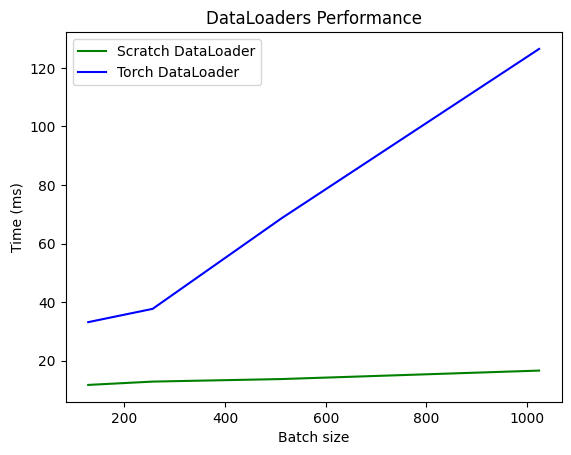

In [64]:
plt.plot(batch_sizes,scratch_dataloader_performance_times,c='g',label="Scratch DataLoader")
plt.plot(batch_sizes,torch_dataloader_performance_times,c='b',label= "Torch DataLoader")
plt.ylabel("Time (ms)")
plt.xlabel("Batch size")
plt.title("DataLoaders Performance")
plt.legend()


## **lol!!!  My Scratch implemented Dataloader won** 😏




# Question 2

## DATA PREPARATION

From question1 Scracth loader is better with Batchsize 128.

**Problem** : Dataset on kaggle have only Training and Testing folder. But we have to inference on Train ,Validation and Test Set.

- **(Solution)** : Split Test set into Test and Validation.




In [147]:
scratch_dataset_train = DatasetScratch(train_dataset_directory_images,train_dataset_directory_labels)
scratch_train_DataLoader =  DataLoaderScratch(scratch_dataset_train,128)

In [148]:
### now what we are doing
# 1) splitting test dataset into 5k validation 5k test
import random
# steps to split the by scratch into val_dataset and test dataset
def save_as_ubyte(images, labels, images_file, labels_file):
    # Save images to ubyte file
    idx2numpy.convert_to_file(images_file,images )

    # Save labels to ubyte file
    idx2numpy.convert_to_file(labels_file,labels)

# Load the original data
images_file = "MNIST_dataset/t10k-images.idx3-ubyte"
labels_file = "MNIST_dataset/t10k-labels.idx1-ubyte"

images = idx2numpy.convert_from_file(images_file)
labels = idx2numpy.convert_from_file(labels_file)

# Split the data
val_size = 5000
validation_images = images[:val_size]
validation_labels = labels[:val_size]
test_images = images[val_size:]
test_labels = labels[val_size:]

#Now doing shuffling
dataset_numpy = list(zip(images,labels))
random.shuffle(dataset_numpy)

images , labels  =  zip(*dataset_numpy)
images , labels = np.array(images), np.array(labels)


# Save the split data into new ubyte files
save_as_ubyte(validation_images, validation_labels, "MNIST_dataset/validation_images.idx3-ubyte", "MNIST_dataset/validation_labels.idx1-ubyte")
save_as_ubyte(test_images, test_labels, "MNIST_dataset/test_images.idx3-ubyte", "MNIST_dataset/test_labels.idx1-ubyte")


scratch_dataset_validation = DatasetScratch("MNIST_dataset/validation_images.idx3-ubyte", "MNIST_dataset/validation_labels.idx1-ubyte")
scratch_validation_DataLoader  = DataLoaderScratch(scratch_dataset_validation,128)

scratch_dataset_test = DatasetScratch("MNIST_dataset/test_images.idx3-ubyte", "MNIST_dataset/test_labels.idx1-ubyte")
scratch_test_DataLoader  = DataLoaderScratch(scratch_dataset_test,128)

## *Model* with Pytorch





In [183]:
import torch.optim as optim
import torch.nn as nn
import torch

class MLP(nn.Module):
  def __init__(self,inputsize,hiddensize,outputsize):
    super().__init__()
    self.layer1 = nn.Linear(inputsize,hiddensize)
    self.relu1 = nn.ReLU()
    self.layer2 = nn.Linear(hiddensize,hiddensize)
    self.relu2 = nn.ReLU()
    self.layer3 = nn.Linear(hiddensize,hiddensize)
    self.relu3 = nn.ReLU()
    self.layer4 = nn.Linear(hiddensize,hiddensize)
    self.relu4 = nn.ReLU()
    self.layer5 = nn.Linear(hiddensize,outputsize)

  def forward(self,X):
    X = self.relu1(self.layer1(X))
    X =self.relu2(self.layer2(X))
    X = self.relu3(self.layer3(X))
    X = self.relu4(self.layer4(X))
    X = self.layer5(X)
    X = nn.functional.softmax(X,dim=1)
    return X



## Let's Do Some Training
- 1) Initiate Model.
- 2) Setting optimizer.
- 3) Setting loss function .
- 4) Setting epochs and Loss function.



**Taining Loop**  
 - forward pass
 - calculating loss
 - backward pass
 - opitimizer step
 - optimizer gradzero

In [208]:
## Model Initialization
inputsize = 784        #=> 28*28 flatten the image pick rowise and add them
hiddensize = 32          # number of hidden neuron
outputsize = 10         # Number of class
model = MLP(inputsize ,hiddensize ,outputsize)

In [209]:
# lets check shape
weights  = model.state_dict()
for weight in weights:
  print(f"{weight}  shape  => ",weights[weight].shape)

layer1.weight  shape  =>  torch.Size([32, 784])
layer1.bias  shape  =>  torch.Size([32])
layer2.weight  shape  =>  torch.Size([32, 32])
layer2.bias  shape  =>  torch.Size([32])
layer3.weight  shape  =>  torch.Size([32, 32])
layer3.bias  shape  =>  torch.Size([32])
layer4.weight  shape  =>  torch.Size([32, 32])
layer4.bias  shape  =>  torch.Size([32])
layer5.weight  shape  =>  torch.Size([10, 32])
layer5.bias  shape  =>  torch.Size([10])


In [210]:
input_size = 28 * 28
hidden_size = 32
output_size = 10

Epochs = 60

learing_rate =0.0003

optimizer = optim.SGD(model.parameters(),lr =learing_rate )

loss_fun = nn.CrossEntropyLoss()

# Lists to store metrics
val_accuracy = []
val_loss = []

train_accuracy = []
train_loss = []

test_accuracy = []
test_loss = []

start_time = time.time()
for epoch in range(Epochs):

# Forward Pass
  model.train()  # Set the model to training mode
  for batch_data, batch_labels in scratch_train_DataLoader:
    # print(batch_data.shape)
    outputs = model(batch_data.view(-1, input_size).float())
    loss = loss_fun(outputs, batch_labels.long())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  # Validation
  model.eval()
  with torch.no_grad():
    total_correct = 0
    total_samples = 0
    vloss = 0
    for val_data, val_labels in scratch_validation_DataLoader:
      val_outputs = model(val_data.view(-1, input_size).float())
      vloss += loss_fun(val_outputs, val_labels.long())
      _, predicted = torch.max(val_outputs, 1)
      total_correct += (predicted == val_labels).sum().item()
      total_samples += val_labels.size(0)

    vloss = vloss / len(scratch_validation_DataLoader)
    vaccuracy = total_correct / total_samples
    val_loss.append(vloss)
    val_accuracy.append(vaccuracy)

  # Training
  total_correct = 0
  total_samples = 0
  tloss = 0
  model.eval()
  with torch.no_grad():
    for train_data, train_labels in scratch_train_DataLoader:
      train_outputs = model(train_data.view(-1, input_size).float())
      tloss += loss_fun(train_outputs, train_labels.long())
      _, predicted = torch.max(train_outputs, 1)
      total_correct += (predicted == train_labels).sum().item()
      total_samples += train_labels.size(0)

  tloss = tloss / len(scratch_train_DataLoader)
  taccuracy = total_correct / total_samples
  train_loss.append(tloss)
  train_accuracy.append(taccuracy)

    # Test
  total_correct = 0
  total_samples = 0
  tsloss = 0
  model.eval()
  with torch.no_grad():
    for test_data, test_labels in scratch_test_DataLoader:
      test_outputs = model(test_data.view(-1, input_size).float())
      tsloss += loss_fun(test_outputs, test_labels.long())
      _, predicted = torch.max(test_outputs, 1)
      total_correct += (predicted == test_labels).sum().item()
      total_samples += test_labels.size(0)

  tsloss = tsloss / len(scratch_test_DataLoader)
  tsaccuracy = total_correct / total_samples
  test_loss.append(tsloss)
  test_accuracy.append(tsaccuracy)

  # Print or log the metrics if needed
  print(f'Epoch {epoch + 1}/{Epochs}, Train Loss: {tloss:.4f}, Train Accuracy: {taccuracy:.4f}')
  print(f'Epoch {epoch + 1}/{Epochs}, Validation Loss: {vloss:.4f}, Validation Accuracy: {vaccuracy:.4f}')
  print(f'Epoch {epoch + 1}/{Epochs}, Test Loss: {tsloss:.4f}, Test Accuracy: {tsaccuracy:.4f}')

end_time = time.time()

pytorch_training_time = end_time-start_time



Epoch 1/60, Train Loss: 2.2474, Train Accuracy: 0.2235
Epoch 1/60, Validation Loss: 2.2524, Validation Accuracy: 0.2082
Epoch 1/60, Test Loss: 2.2359, Test Accuracy: 0.2500
Epoch 2/60, Train Loss: 2.1502, Train Accuracy: 0.3358
Epoch 2/60, Validation Loss: 2.1524, Validation Accuracy: 0.3386
Epoch 2/60, Test Loss: 2.1271, Test Accuracy: 0.3540
Epoch 3/60, Train Loss: 2.0604, Train Accuracy: 0.4472
Epoch 3/60, Validation Loss: 2.0754, Validation Accuracy: 0.4394
Epoch 3/60, Test Loss: 2.0305, Test Accuracy: 0.4800
Epoch 4/60, Train Loss: 1.9526, Train Accuracy: 0.5644
Epoch 4/60, Validation Loss: 1.9802, Validation Accuracy: 0.5394
Epoch 4/60, Test Loss: 1.9153, Test Accuracy: 0.5926
Epoch 5/60, Train Loss: 1.8876, Train Accuracy: 0.6098
Epoch 5/60, Validation Loss: 1.9151, Validation Accuracy: 0.5850
Epoch 5/60, Test Loss: 1.8467, Test Accuracy: 0.6444
Epoch 6/60, Train Loss: 1.8579, Train Accuracy: 0.6284
Epoch 6/60, Validation Loss: 1.8887, Validation Accuracy: 0.6062
Epoch 6/60, Tes

## Plots
+ **(Epoch Vs Accuracy)**
+ **(Epoch Vs Loss)**


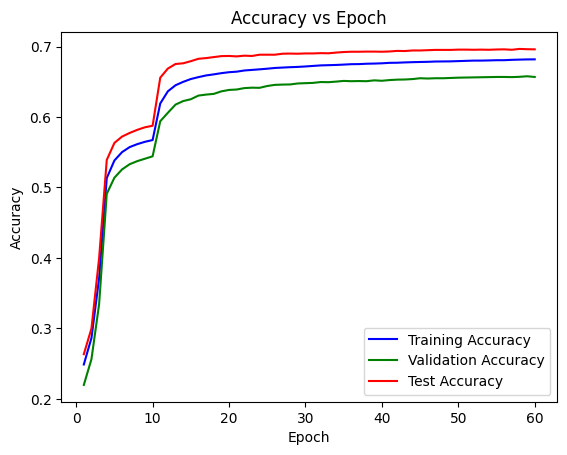

In [191]:
epochs = [i for i in range(1,61)]
plt.plot(epochs,train_accuracy,c='b',label ="Training Accuracy")
plt.plot(epochs,val_accuracy,c='g',label ="Validation Accuracy")
plt.plot(epochs,test_accuracy,c='r',label = "Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch")
plt.legend()

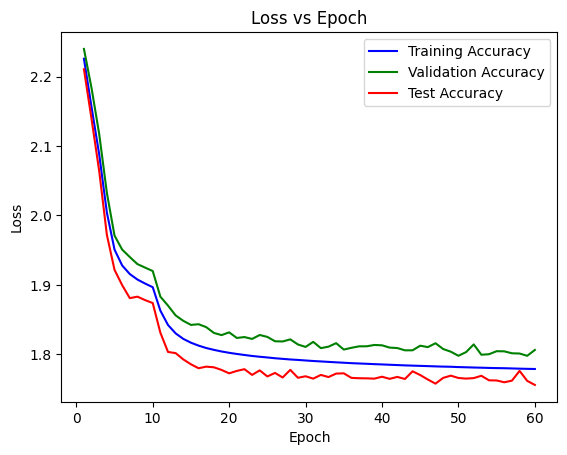

In [192]:
epochs = [i for i in range(1,61)]
plt.plot(epochs,train_loss,c='b',label ="Training Accuracy")
plt.plot(epochs,val_loss,c='g',label ="Validation Accuracy")
plt.plot(epochs,test_loss,c='r',label = "Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.legend()

## Final Inference

In [193]:
# # On Test Data
model.eval()
with torch.no_grad():
    total_correct = 0
    total_samples = 0
    for test_data, test_labels in scratch_test_DataLoader:
        test_outputs = model(test_data.view(-1,input_size).float())
        _, predicted = torch.max(test_outputs, 1)
        total_correct += (predicted == test_labels).sum().item()
        total_samples += test_labels.size(0)

    accuracy = total_correct / total_samples
    print(f'Test Accuracy: {accuracy*100:.2f}')

# On Validation Data
model.eval()
with torch.no_grad():
    total_correct = 0
    total_samples = 0
    for val_data, val_labels in scratch_validation_DataLoader:
        val_outputs = model(val_data.view(-1,input_size).float())
        _, predicted = torch.max(val_outputs, 1)
        total_correct += (predicted == val_labels).sum().item()
        total_samples += val_labels.size(0)

    accuracy = total_correct / total_samples
    print(f'Validation  Accuracy: {accuracy*100:.2f}')

# on Train Data
model.eval()
with torch.no_grad():
    total_correct = 0
    total_samples = 0
    for train_data, train_labels in scratch_train_DataLoader:
        train_outputs = model(train_data.view(-1,input_size).float())
        _, predicted = torch.max(train_outputs, 1)
        total_correct += (predicted == train_labels).sum().item()
        total_samples += train_labels.size(0)

    accuracy = total_correct / total_samples
    print(f'Train Accuracy: {accuracy*100:.2f}')

Test Accuracy: 69.60
Validation  Accuracy: 65.68
Train Accuracy: 68.18


## Now  I am doing some Manual inference for checking

In [197]:
image,label = scratch_dataset_train[10]
image = image.numpy()

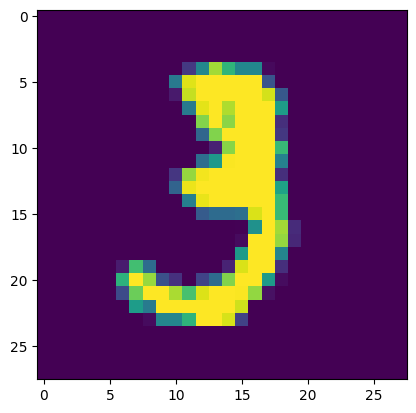

In [195]:
## Now convert it into numpy for plotting image
plt.imshow(image)

In [196]:
with torch.no_grad():
    prediction = torch.argmax(model(torch.tensor(image).view(-1,input_size).float()))
print("Label--> ",label ,"Prediction --> ",prediction)


Label-->  tensor(3.) Prediction -->  tensor(3)


Real label is 3 My Model predict 8 😢





# Question 3




## Model From Scratch Training And Testing

In [198]:
import torch

def normalize_image_tensor(image_tensor):
    # Convert to floating-point if not already
    image_tensor = image_tensor.float()
    # Perform min-max normalization
    min_value = torch.min(image_tensor)
    max_value = torch.max(image_tensor)
    normalized_tensor = (image_tensor - min_value) / (max_value - min_value)
    return normalized_tensor

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return torch.max(torch.tensor(0.0), x)

def softmax(x):
    exp_values = torch.exp(x - torch.max(x, dim=1, keepdim=True)[0])
    sum_exp_values = torch.sum(exp_values, dim=1, keepdim=True)
    softmax_output = exp_values / sum_exp_values
    return softmax_output


def categorical_crossentropy(y_true, y_pred):
    # Clip y_pred to avoid log(0) issues
    epsilon = 1e-15
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)
    # Calculate cross-entropy loss
    loss = -torch.sum(y_true * torch.log(y_pred)) / len(y_true)
    return loss

def normalize_image_tensor(image_tensor):
    # Convert to floating-point if not already
    image_tensor = image_tensor.float()

    # Perform min-max normalization
    min_value = torch.min(image_tensor)
    max_value = torch.max(image_tensor)
    normalized_tensor = (image_tensor - min_value) / (max_value - min_value)

    return normalized_tensor

def relu_derivative(x):
    return torch.where(x < 0, torch.tensor(0.0), torch.tensor(1.0))


torch.manual_seed(42)
class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers
        # Initialize all weights with Xavier/Glorot initialization
        self.weights = [ torch.randn(layers[i], layers[i+1]) / np.sqrt(layers[i]) for i in range(len(layers)-1)]
        self.biases = [torch.zeros((1, layers[i+1])) for i in range(len(layers)-1)]

        print("*****Your Model Weights are of shape")
        for weights in self.weights:
            print(weights.shape)

        print("*****Your Model biases are of shape")
        for bias in self.biases:
            print(bias.shape)


    def forward(self, X, activation_fun, softmax):
        self.activations = [X]

        self.linear_outputs = []
        for i in range(len(self.layers)-2):
            # Z = X @ w + biases
            self.linear_outputs.append(self.activations[-1] @ self.weights[i] + self.biases[i])
            # a = activation_fun(Z)
            self.activations.append(activation_fun(self.linear_outputs[-1]))

        # Output layer with softmax activation
        self.linear_outputs.append(self.activations[-1] @ self.weights[-1] + self.biases[-1])
        self.activations.append(softmax(self.linear_outputs[-1]))
        return self.activations[-1]


    def backward(self, X, y, learning_rate, activation_fun_derivative):
        # print("aaate waqt --> ",self.weights[4])
        output_error = self.activations[-1] - y
        # print( torch.norm(output_error, dim=1))
        batch_size = X.shape[0]
        output_delta = output_error/batch_size

        # Update weights and biases for the output layer
        dwL = (self.activations[-2].T @ output_delta)
        self.weights[-1] = self.weights[-1] - (learning_rate * dwL)

        dbL = torch.sum(output_delta, axis=0, keepdim=True)
        self.biases[-1] = self.biases[-1] - learning_rate * dbL

        for i in range(len(self.weights)-2, 0, -1):
            hidden_error = output_delta @ self.weights[i+1].T
            hidden_delta = activation_fun_derivative(self.activations[i]) * hidden_error

            # Update weights and biases for hidden layers with gradient clipping
            dwi = self.activations[i].T @ hidden_delta
            self.weights[i] = self.weights[i] - learning_rate * dwi

            dbi = torch.sum(hidden_delta, axis=0, keepdim=True)
            self.biases[i] = self.biases[i] - learning_rate * dbi

            output_delta = hidden_delta

        dw0 = (X.T @ output_delta)
        self.weights[0] = self.weights[0] - learning_rate * dw0

        db0 = torch.sum(output_delta, axis=0, keepdim=True)
        self.biases[0] = self.biases[0] - learning_rate * db0


        # print("Jaate waqt --> ",self.weights[4])


    def train(self,learning_rate, activation_fun, softmax, activation_fun_derivative,epochs,Train_DataLoader,Validation_DataLoader,Test_DataLoader,Normalize):
        self.Validation_losses =[]
        self.Validation_accuracy =[]
        self.Test_losses = []
        self.Test_accuracy = []
        self.Train_losses = []
        self.Train_accuracy = []
        criterion = categorical_crossentropy
        for epoch in range(epochs):
            total_loss_train=0
            total_correct_train =0
            total_examples_train=0
# ******************************* train_DataLoader *******************************************************
            for X,y in Train_DataLoader:
                X =Normalize(X.view(X.shape[0],-1).float())
                # one hot encoding
                num_class= 10
                one_hot_encode = torch.eye(num_class)[y.squeeze().long()]
                output = self.forward(X, activation_fun, softmax)

                # calculating total correct
                _, predicted = torch.max(output, 1)
                correct = (predicted == y).float()
                total_correct_train+=(correct.sum().item())


                # calculating total Examples
                total_examples_train+=X.shape[0]

                # calculating loss
                loss= criterion(one_hot_encode,output)
                total_loss_train+= loss
                # print(f"loss --> {loss:.2f}")
                self.backward(X, one_hot_encode, learning_rate, activation_fun_derivative)

            train_loss  = (total_loss_train/len(Train_DataLoader))
            train_accuracy = (total_correct_train/total_examples_train)*100
            self.Train_losses.append(train_loss)
            self.Train_accuracy.append(train_accuracy)

# ******************************* Validation_DataLoader *******************************************************
            total_loss_val=0
            total_correct_val =0
            total_examples_val=0
            for X,y in Validation_DataLoader:
                X =Normalize(X.view(X.shape[0],-1).float())
                # one hot encoding
                num_class= 10
                one_hot_encode = torch.eye(num_class)[y.squeeze().long()]
                output = self.forward(X, activation_fun, softmax)

                # calculating total correct
                _, predicted = torch.max(output, 1)
                correct = (predicted == y).float()
                total_correct_val+=(correct.sum().item())


                # calculating total Examples
                total_examples_val+=X.shape[0]

                # calculating loss
                loss= criterion(one_hot_encode,output)
                total_loss_val+= loss
                # print(f"loss --> {loss:.2f}")
                # self.backward(X, one_hot_encode, learning_rate, activation_fun_derivative)

            validation_loss   = (total_loss_val/len(Validation_DataLoader))
            validation_accuracy = (total_correct_val/total_examples_val)*100
            self.Validation_losses.append(validation_loss)
            self.Validation_accuracy.append(validation_accuracy)

# ******************************* Test_DataLoader *******************************************************
            total_loss_test=0
            total_correct_test =0
            total_examples_test=0
            for X,y in Test_DataLoader:
                X =Normalize(X.view(X.shape[0],-1).float())
                # one hot encoding
                num_class= 10
                one_hot_encode = torch.eye(num_class)[y.squeeze().long()]
                output = self.forward(X, activation_fun, softmax)

                # calculating total correct
                _, predicted = torch.max(output, 1)
                correct = (predicted == y).float()
                total_correct_test+=(correct.sum().item())


                # calculating total Examples
                total_examples_test+=X.shape[0]

                # calculating loss
                loss= criterion(one_hot_encode,output)
                total_loss_test+= loss
                # print(f"loss --> {loss:.2f}")
                # self.backward(X, one_hot_encode, learning_rate, activation_fun_derivative)

            test_loss   = (total_loss_test/len(Test_DataLoader))
            test_accuracy = (total_correct_test/total_examples_test)*100
            self.Test_losses.append(test_loss)
            self.Test_accuracy.append(test_accuracy)

            print(f"Epoch :{epoch}/{epochs}, Train Loss:{train_loss: .2f}  Train Accuracy:{train_accuracy: .2f}")
            print(f"Epoch :{epoch}/{epochs},  Validation Loss:{validation_loss: .2f}  Validation Accuracy:{validation_accuracy: .2f}")
            print(f"Epoch :{epoch}/{epochs},  Test Loss:{test_loss: .2f}  Test Accuracy:{test_accuracy: .2f}")




# Example usage
input_size = 784  # MNIST input size
hidden_size = 32
output_size = 10
learning_rate = 0.003
epochs = 60
model_scratch = NeuralNetwork([input_size, hidden_size, hidden_size, hidden_size, hidden_size, output_size])
start_time = time.time()
model_scratch.train(learning_rate,relu,softmax,relu_derivative,epochs,scratch_train_DataLoader,scratch_validation_DataLoader,scratch_test_DataLoader,normalize_image_tensor)
end_time = time.time()
scratch_model_training_time = end_time - start_time







*****Your Model Weights are of shape
torch.Size([784, 32])
torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([32, 10])
*****Your Model biases are of shape
torch.Size([1, 32])
torch.Size([1, 32])
torch.Size([1, 32])
torch.Size([1, 32])
torch.Size([1, 10])
Epoch :0/60, Train Loss: 2.30  Train Accuracy: 16.05
Epoch :0/60,  Validation Loss: 2.29  Validation Accuracy: 18.80
Epoch :0/60,  Test Loss: 2.29  Test Accuracy: 21.06
Epoch :1/60, Train Loss: 2.25  Train Accuracy: 24.23
Epoch :1/60,  Validation Loss: 2.19  Validation Accuracy: 26.06
Epoch :1/60,  Test Loss: 2.17  Test Accuracy: 24.30
Epoch :2/60, Train Loss: 2.01  Train Accuracy: 29.01
Epoch :2/60,  Validation Loss: 1.80  Validation Accuracy: 42.48
Epoch :2/60,  Test Loss: 1.69  Test Accuracy: 48.68
Epoch :3/60, Train Loss: 1.47  Train Accuracy: 53.39
Epoch :3/60,  Validation Loss: 1.33  Validation Accuracy: 54.20
Epoch :3/60,  Test Loss: 1.14  Test Accuracy: 62.42
Epoch :4/60, Train Loss: 1.10  Train Accuracy

## Plots
- **Epoch vs Accuracy**
- **Epoch vs Loss**

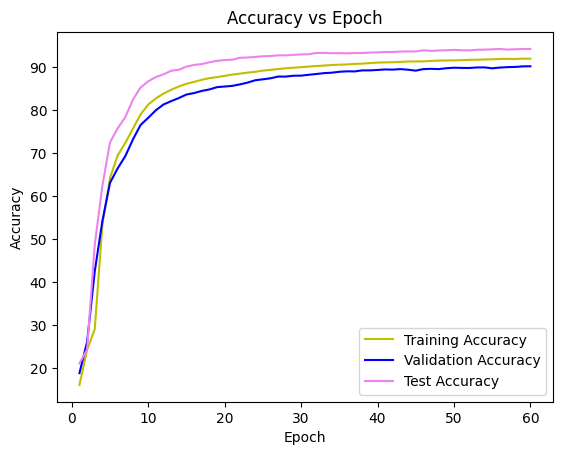

In [199]:
epochs = [i for i in range(1,61)]
plt.plot(epochs,model_scratch.Train_accuracy,c='y',label ="Training Accuracy")
plt.plot(epochs,model_scratch.Validation_accuracy,c='b',label ="Validation Accuracy")
plt.plot(epochs,model_scratch.Test_accuracy,c='violet',label = "Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch")
plt.legend()

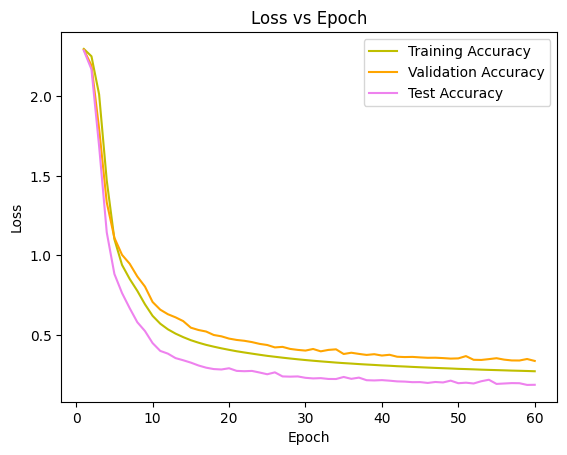

In [200]:
epochs = [i for i in range(1,61)]
plt.plot(epochs,model_scratch.Train_losses,c='y',label ="Training Accuracy")
plt.plot(epochs,model_scratch.Validation_losses,c='orange',label ="Validation Accuracy")
plt.plot(epochs,model_scratch.Test_losses,c='violet',label = "Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.legend()

## FINAL Inference with Scratch Model

In [201]:
### On Validation Data
total_correct_val =0
total_examples_val=0
for X,y in scratch_validation_DataLoader:
    X =normalize_image_tensor(X.view(X.shape[0],-1).float())
    # one hot encoding
    num_class= 10
    one_hot_encode = torch.eye(num_class)[y.squeeze().long()]
    output = model_scratch.forward(X, relu, softmax)
    # calculating total correct
    _, predicted = torch.max(output, 1)
    correct = (predicted == y).float()
    total_correct_val+=(correct.sum().item())
    # calculating total Examples
    total_examples_val+=X.shape[0]
validation_accuracy = (total_correct_val/total_examples_val)*100
print(f'Validation  Accuracy: {validation_accuracy:.2f}')

### On Test Data
total_correct_test =0
total_examples_test =0
for X,y in scratch_test_DataLoader:
    X =normalize_image_tensor(X.view(X.shape[0],-1).float())
    # one hot encoding
    num_class= 10
    one_hot_encode = torch.eye(num_class)[y.squeeze().long()]
    output = model_scratch.forward(X, relu, softmax)
    # calculating total correct
    _, predicted = torch.max(output, 1)
    correct = (predicted == y).float()
    total_correct_test+=(correct.sum().item())
    # calculating total Examples
    total_examples_test+=X.shape[0]
test_accuracy = (total_correct_test/total_examples_test)*100
print(f'Test  Accuracy: {test_accuracy:.2f}')


### On Train Data
total_correct_train =0
total_examples_train =0
for X,y in scratch_train_DataLoader:
    X =normalize_image_tensor(X.view(X.shape[0],-1).float())
    # one hot encoding
    num_class= 10
    one_hot_encode = torch.eye(num_class)[y.squeeze().long()]
    output = model_scratch.forward(X, relu, softmax)
    # calculating total correct
    _, predicted = torch.max(output, 1)
    correct = (predicted == y).float()
    total_correct_train+=(correct.sum().item())
    # calculating total Examples
    total_examples_train+=X.shape[0]
train_accuracy = (total_correct_train/total_examples_train)*100
print(f'Train  Accuracy: {train_accuracy:.2f}')



Validation  Accuracy: 90.26
Test  Accuracy: 94.30
Train  Accuracy: 92.15


## Manual Inferencing on Scratch Model

In [202]:
image,label = scratch_dataset_train[10]


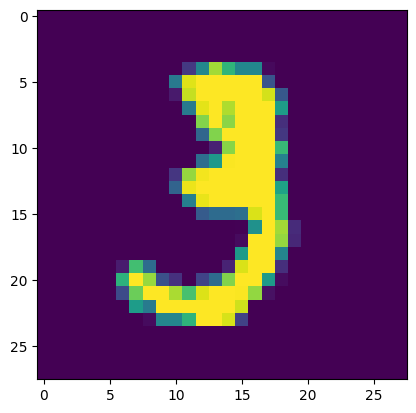

In [203]:
plt.imshow(image.numpy())

In [204]:
prediction = torch.argmax(model_scratch.forward(normalize_image_tensor(image.view(1,784).float()),relu,softmax))

In [205]:
print("True Label -> ",label.item(), " Prediction -> ",prediction.item())

True Label ->  3.0  Prediction ->  3


In [211]:
print(scratch_model_training_time)
print(pytorch_training_time)


-49.11721205711365
70.13110089302063


## My Scratch Model is better than pytorch **😭**

## Now torch Model Backprop vs My Scratch Model (Report)

##**Torch Model**

Training with Inference on (Validation , Test , Train Dataset) Time  = 70.13 seconds

*   **Accuracies**
  - Train Dataset : 75.92
  - Test Dataset : 77.44
  - Validation Dataset : 73.40

*   **Losses**
  - Train Dataset : 1.7044
  - Test Dataset : 1.6875
  - Validation Dataset : 1.7285


##**Scratch Model**

Training with Inference on (Validation , Test , Train Dataset) Time  =49.12

*   **Accuracies**
  - Train Dataset : 92.15
  - Test Dataset : 94.30
  - Validation Dataset : 90.26

*   **Losses**
  - Train Dataset : 0.27
  - Test Dataset : 0.19
  - Validation Dataset : 0.34


   





# Question4

## Now Doing All the things same just changing activation function to softmax

In [162]:
import torch.optim as optim
import torch.nn as nn
import torch
class MLP_Sigmoid(nn.Module):
  def __init__(self,inputsize,hiddensize,outputsize):
    super().__init__()
    self.layer1 = nn.Linear(inputsize,hiddensize)
    self.sigmoid1 = nn.Sigmoid()
    self.layer2 = nn.Linear(hiddensize,hiddensize)
    self.sigmoid2 = nn.Sigmoid()
    self.layer3 = nn.Linear(hiddensize,hiddensize)
    self.sigmoid3 = nn.Sigmoid()
    self.layer4 = nn.Linear(hiddensize,hiddensize)
    self.sigmoid4 = nn.Sigmoid()
    self.layer5 = nn.Linear(hiddensize,outputsize)

  def forward(self,X):
    X = self.sigmoid1(self.layer1(X))
    X =self.sigmoid2(self.layer2(X))
    X = self.sigmoid3(self.layer3(X))
    X = self.sigmoid4(self.layer4(X))
    X = self.layer5(X)
    X = nn.functional.softmax(X,dim=1)
    return X



In [163]:
## Model Initialization
inputsize = 784        #=> 28*28 flatten the image pick rowise and add them
hiddensize = 32          # number of hidden neuron
outputsize = 10         # Number of class
model_sigmoid = MLP_Sigmoid(inputsize ,hiddensize ,outputsize)

In [164]:
# lets check shape
weights  = model_sigmoid.state_dict()
for weight in weights:
  print(f"{weight}  shape  => ",weights[weight].shape)

layer1.weight  shape  =>  torch.Size([32, 784])
layer1.bias  shape  =>  torch.Size([32])
layer2.weight  shape  =>  torch.Size([32, 32])
layer2.bias  shape  =>  torch.Size([32])
layer3.weight  shape  =>  torch.Size([32, 32])
layer3.bias  shape  =>  torch.Size([32])
layer4.weight  shape  =>  torch.Size([32, 32])
layer4.bias  shape  =>  torch.Size([32])
layer5.weight  shape  =>  torch.Size([10, 32])
layer5.bias  shape  =>  torch.Size([10])


In [165]:
input_size = 28 * 28
hidden_size = 32
output_size = 10

Epochs = 60

learing_rate =0.0003

optimizer = optim.SGD(model.parameters(),lr =learing_rate )

loss_fun = nn.CrossEntropyLoss()

# Lists to store metrics
val_accuracy = []
val_loss = []

train_accuracy = []
train_loss = []

test_accuracy = []
test_loss = []


for epoch in range(Epochs):

# Forward Pass
  model_sigmoid.train()  # Set the model to training mode
  for batch_data, batch_labels in scratch_train_DataLoader:
    # print(batch_data.shape)
    outputs = model(batch_data.view(-1, input_size).float())
    loss = loss_fun(outputs, batch_labels.long())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  # Validation
  model.eval()
  with torch.no_grad():
    total_correct = 0
    total_samples = 0
    vloss = 0
    for val_data, val_labels in scratch_validation_DataLoader:
      val_outputs = model(val_data.view(-1, input_size).float())
      vloss += loss_fun(val_outputs, val_labels.long())
      _, predicted = torch.max(val_outputs, 1)
      total_correct += (predicted == val_labels).sum().item()
      total_samples += val_labels.size(0)

    vloss = vloss / len(scratch_validation_DataLoader)
    vaccuracy = total_correct / total_samples
    val_loss.append(vloss)
    val_accuracy.append(vaccuracy*100)

  # Training
  total_correct = 0
  total_samples = 0
  tloss = 0
  model.eval()
  with torch.no_grad():
    for train_data, train_labels in scratch_train_DataLoader:
      train_outputs = model(train_data.view(-1, input_size).float())
      tloss += loss_fun(train_outputs, train_labels.long())
      _, predicted = torch.max(train_outputs, 1)
      total_correct += (predicted == train_labels).sum().item()
      total_samples += train_labels.size(0)

  tloss = tloss / len(scratch_train_DataLoader)
  taccuracy = total_correct / total_samples
  train_loss.append(tloss)
  train_accuracy.append(taccuracy*100)

    # Test
  total_correct = 0
  total_samples = 0
  tsloss = 0
  model.eval()
  with torch.no_grad():
    for test_data, test_labels in scratch_test_DataLoader:
      test_outputs = model(test_data.view(-1, input_size).float())
      tsloss += loss_fun(test_outputs, test_labels.long())
      _, predicted = torch.max(test_outputs, 1)
      total_correct += (predicted == test_labels).sum().item()
      total_samples += test_labels.size(0)

  tsloss = tsloss / len(scratch_test_DataLoader)
  tsaccuracy = total_correct / total_samples
  test_loss.append(tsloss)
  test_accuracy.append(tsaccuracy*100)

  # Print or log the metrics if needed
  print(f'Epoch {epoch + 1}/{Epochs}, Train Loss: {tloss:.4f}, Train Accuracy: {taccuracy:.4f}')
  print(f'Epoch {epoch + 1}/{Epochs}, Validation Loss: {vloss:.4f}, Validation Accuracy: {vaccuracy:.4f}')
  print(f'Epoch {epoch + 1}/{Epochs}, Test Loss: {tsloss:.4f}, Test Accuracy: {tsaccuracy:.4f}')




Epoch 1/60, Train Loss: 2.3022, Train Accuracy: 0.0986
Epoch 1/60, Validation Loss: 2.3022, Validation Accuracy: 0.0924
Epoch 1/60, Test Loss: 2.3024, Test Accuracy: 0.0992
Epoch 2/60, Train Loss: 2.3022, Train Accuracy: 0.0986
Epoch 2/60, Validation Loss: 2.3021, Validation Accuracy: 0.0924
Epoch 2/60, Test Loss: 2.3025, Test Accuracy: 0.0992
Epoch 3/60, Train Loss: 2.3022, Train Accuracy: 0.0986
Epoch 3/60, Validation Loss: 2.3024, Validation Accuracy: 0.0924
Epoch 3/60, Test Loss: 2.3020, Test Accuracy: 0.0992
Epoch 4/60, Train Loss: 2.3022, Train Accuracy: 0.0986
Epoch 4/60, Validation Loss: 2.3018, Validation Accuracy: 0.0924
Epoch 4/60, Test Loss: 2.3024, Test Accuracy: 0.0992
Epoch 5/60, Train Loss: 2.3022, Train Accuracy: 0.0986
Epoch 5/60, Validation Loss: 2.3023, Validation Accuracy: 0.0924
Epoch 5/60, Test Loss: 2.3020, Test Accuracy: 0.0992
Epoch 6/60, Train Loss: 2.3022, Train Accuracy: 0.0986
Epoch 6/60, Validation Loss: 2.3017, Validation Accuracy: 0.0924
Epoch 6/60, Tes

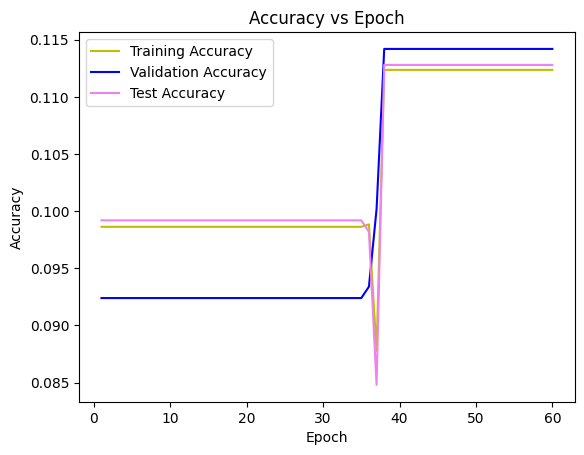

In [174]:
epochs = [i for i in range(1,61)]
plt.plot(epochs,train_accuracy,c='y',label ="Training Accuracy")
plt.plot(epochs,val_accuracy,c='b',label ="Validation Accuracy")
plt.plot(epochs,test_accuracy,c='violet',label = "Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch")
plt.legend()

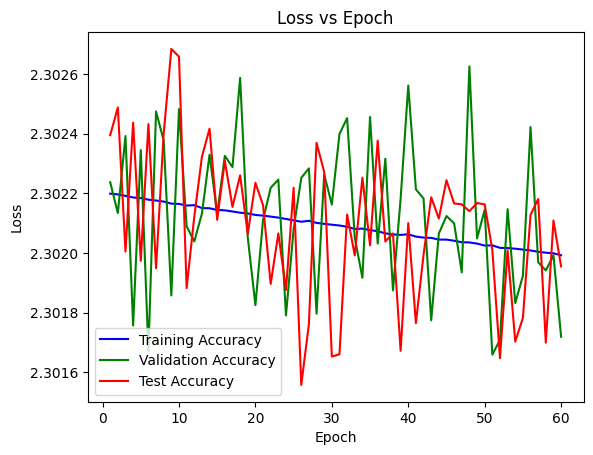

In [173]:
epochs = [i for i in range(1,61)]
plt.plot(epochs,train_loss,c='b',label ="Training Accuracy")
plt.plot(epochs,val_loss,c='g',label ="Validation Accuracy")
plt.plot(epochs,test_loss,c='r',label = "Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.legend()

In [175]:
## Torch with sigmoid performance very bad with sigmoid usage Now check What our superior Scratch Model would do

In [176]:
# Example usage
input_size = 784  # MNIST input size
hidden_size = 32
output_size = 10
learning_rate = 0.003
epochs = 60
model_scratch_sigmoid = NeuralNetwork([input_size, hidden_size, hidden_size, hidden_size, hidden_size, output_size])
model_scratch_sigmoid.train(learning_rate,sigmoid,softmax,sigmoid_derivative,epochs,scratch_train_DataLoader,scratch_validation_DataLoader,scratch_test_DataLoader,normalize_image_tensor)

*****Your Model Weights are of shape
torch.Size([784, 32])
torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([32, 32])
torch.Size([32, 10])
*****Your Model biases are of shape
torch.Size([1, 32])
torch.Size([1, 32])
torch.Size([1, 32])
torch.Size([1, 32])
torch.Size([1, 10])
Epoch :0/60, Train Loss: 2.35  Train Accuracy: 10.98
Epoch :0/60,  Validation Loss: 2.31  Validation Accuracy: 11.42
Epoch :0/60,  Test Loss: 2.31  Test Accuracy: 11.28
Epoch :1/60, Train Loss: 2.30  Train Accuracy: 11.24
Epoch :1/60,  Validation Loss: 2.30  Validation Accuracy: 11.42
Epoch :1/60,  Test Loss: 2.30  Test Accuracy: 11.28
Epoch :2/60, Train Loss: 2.30  Train Accuracy: 11.24
Epoch :2/60,  Validation Loss: 2.30  Validation Accuracy: 11.42
Epoch :2/60,  Test Loss: 2.30  Test Accuracy: 11.28
Epoch :3/60, Train Loss: 2.30  Train Accuracy: 11.24
Epoch :3/60,  Validation Loss: 2.30  Validation Accuracy: 11.42
Epoch :3/60,  Test Loss: 2.30  Test Accuracy: 11.28
Epoch :4/60, Train Loss: 2.30  Train Accuracy

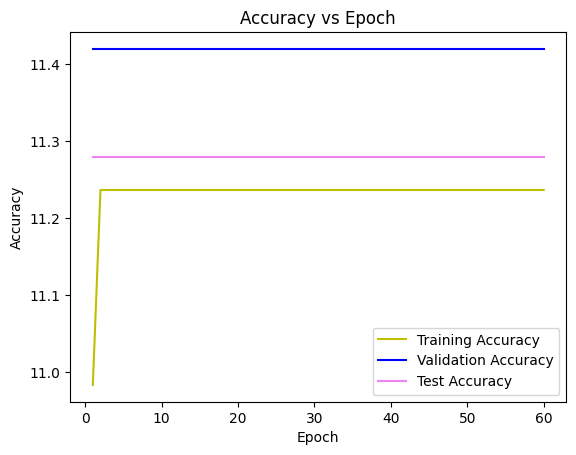

In [177]:
epochs = [i for i in range(1,61)]
plt.plot(epochs,model_scratch_sigmoid.Train_accuracy,c='y',label ="Training Accuracy")
plt.plot(epochs,model_scratch_sigmoid.Validation_accuracy,c='b',label ="Validation Accuracy")
plt.plot(epochs,model_scratch_sigmoid.Test_accuracy,c='violet',label = "Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch")
plt.legend()

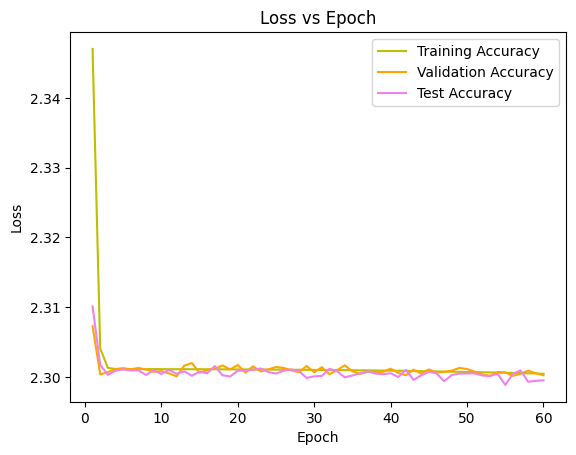

In [179]:
epochs = [i for i in range(1,61)]
plt.plot(epochs,model_scratch_sigmoid.Train_losses,c='y',label ="Training Accuracy")
plt.plot(epochs,model_scratch_sigmoid.Validation_losses,c='orange',label ="Validation Accuracy")
plt.plot(epochs,model_scratch_sigmoid.Test_losses,c='violet',label = "Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.legend()

## Sigmoid With Worst perfomance 😢  ReLU supermacy